In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("titanic train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
data.Cabin.isnull().sum()
## Has more null values and its better to remove

687

In [6]:
data.shape

(891, 12)

In [7]:
(891/100)*5

44.55

In [8]:
## FRom the above columns we dont require Name,Cabin,passengerid,Fare,Ticket
## REmoving the above columns
data=data.drop(['Name','Cabin',"Fare","Ticket",'PassengerId'],axis=1)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [12]:
data['Age']=data['Age'].astype('float')
data['Sex']=data['Sex'].astype('category')
data['Embarked']=data['Embarked'].astype('category')

In [13]:
data=data.drop(['Age'],axis=1)

In [14]:
data.dtypes

Survived       int64
Pclass         int64
Sex         category
SibSp          int64
Parch          int64
Embarked    category
dtype: object

In [15]:
data.Embarked.fillna(value='S',inplace=True)

In [16]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [19]:
import seaborn as sns

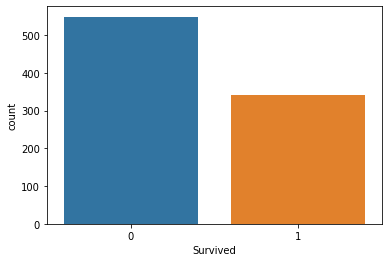

In [20]:
sns.countplot(data['Survived'])

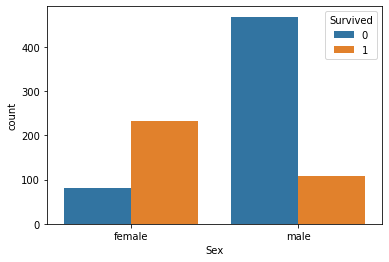

In [21]:
sns.countplot('Sex',hue='Survived',data=data)

## seperating target and fetures


In [22]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [23]:
x.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## converting categorical to numeric

In [25]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,1,0,1
1,1,1,0,0,0,0
2,3,0,0,0,0,1
3,1,1,0,0,0,1
4,3,0,0,1,0,1


##  k fold Cross validation

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score , recall_score
from sklearn.model_selection import KFold,StratifiedKFold


In [61]:
clf=DecisionTreeClassifier( criterion='gini',
    splitter='best',class_weight='balanced',max_depth=4,min_samples_leaf=10,min_samples_split=10)


In [28]:
#kf=KFold(n_splits=4,shuffle=True)

In [29]:
#kf

In [30]:
#for train_index,test_index in kf.split(x):
#    print(train_index,test_index)
 #   print("##########Next Split########")

In [31]:
#prec=[]
#rec=[]
#for train_index,test_index in kf.split(x):
#    print("#####Next Fold#######")
#    x_train,x_test = x.iloc[train_index,:],x.iloc[test_index,:]
#    y_train,y_test = y[train_index],y[test_index]
 #clf.fit(x_train,y_train)
 #   preds=clf.predict(x_test)
  #  prec_score=precision_score(y_test,preds)
 #   rec_score=recall_score(y_test,preds)
  #  rec.append(rec_score)
  #  prec.append(prec_score)
    

In [32]:
#np.mean(prec)

In [33]:
#np.mean(rec)

## Stratified kfold

In [62]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=4,shuffle=True)

In [63]:
rec=[]
prec=[]
for train_index,test_index in kf.split(x,y):
    x_train,x_test=x.iloc[train_index,:],x.iloc[test_index,:]
    y_train,y_test=y[train_index],y[test_index]
    clf.fit(x_train,y_train)
    preds=clf.predict(x_test)
    prec_score=precision_score(y_test,preds)
    rec_score=recall_score(y_test,preds)
    rec.append(rec_score)
    prec.append(prec_score)


In [64]:
np.mean(prec)

0.716120831615082

In [65]:
np.mean(rec)

0.7281463748290014

In [38]:
x_train.shape,y_train.shape

((669, 6), (669,))

In [39]:
x_test.shape,y_test.shape

((222, 6), (222,))

In [40]:
669+222

891

## Crossval Score

In [66]:
from sklearn.model_selection import cross_val_score
f1_score=cross_val_score(clf,x,y,cv=4,n_jobs=-1,scoring='f1')
np.mean(f1_score)

0.6964362618432386

## Model Building

In [70]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,preds)

array([[108,  29],
       [ 22,  63]], dtype=int64)

In [134]:
print("######Train performance#####")
print(classification_report(y_train,clf.predict(x_train)))

######Train performance#####
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       412
           1       0.77      0.79      0.78       257

    accuracy                           0.83       669
   macro avg       0.82      0.82      0.82       669
weighted avg       0.83      0.83      0.83       669



In [133]:
print("######Test performance#####")
print(classification_report(y_test,preds))

######Test performance#####
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       137
           1       0.70      0.73      0.72        85

    accuracy                           0.78       222
   macro avg       0.77      0.77      0.77       222
weighted avg       0.78      0.78      0.78       222



## visualiase the tree

[Text(418.5, 489.24, 'Sex_male <= 0.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(209.25, 380.52000000000004, 'Pclass <= 2.5\ngini = 0.279\nsamples = 35.0%\nvalue = [0.167, 0.833]'),
 Text(104.625, 271.8, 'Pclass <= 1.5\ngini = 0.065\nsamples = 19.7%\nvalue = [0.034, 0.966]'),
 Text(52.3125, 163.08000000000004, 'Parch <= 1.5\ngini = 0.034\nsamples = 10.9%\nvalue = [0.017, 0.983]'),
 Text(26.15625, 54.360000000000014, '\n  (...)  \n'),
 Text(78.46875, 54.360000000000014, '\n  (...)  \n'),
 Text(156.9375, 163.08000000000004, 'SibSp <= 0.5\ngini = 0.103\nsamples = 8.8%\nvalue = [0.055, 0.945]'),
 Text(130.78125, 54.360000000000014, '\n  (...)  \n'),
 Text(183.09375, 54.360000000000014, '\n  (...)  \n'),
 Text(313.875, 271.8, 'Embarked_S <= 0.5\ngini = 0.469\nsamples = 15.2%\nvalue = [0.375, 0.625]'),
 Text(261.5625, 163.08000000000004, 'Parch <= 0.5\ngini = 0.369\nsamples = 6.1%\nvalue = [0.244, 0.756]'),
 Text(235.40625, 54.360000000000014, '\n  (...)  \n'),
 Text(287.7187

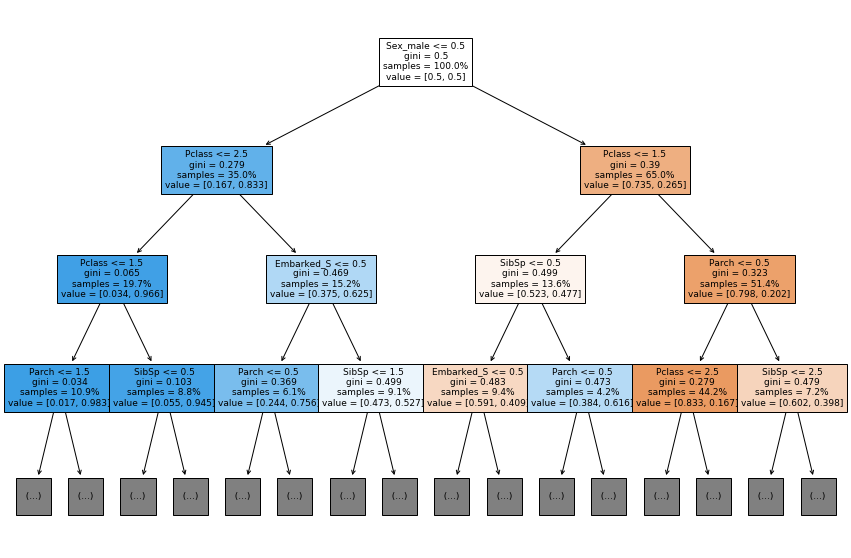

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,10))
plot_tree(clf,filled=True,max_depth=3,fontsize=9,feature_names=x.columns.values,proportion=True)

In [80]:
clf.feature_importances_

array([0.17927184, 0.05869956, 0.03143149, 0.71101808, 0.        ,
       0.01957903])

In [154]:
dict(zip(x.columns.values,clf.feature_importances_*100))

{'Pclass': 20.414656646248744,
 'SibSp': 8.085840529378473,
 'Parch': 8.446489833290743,
 'Sex_male': 58.479564571473965,
 'Embarked_Q': 1.8021063117214797,
 'Embarked_S': 2.7713421078866025}

## Bagging

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [85]:
base_classifier=DecisionTreeClassifier(criterion='gini',
    splitter='best',class_weight='balanced',max_depth=4,min_samples_leaf=10,min_samples_split=10)

base_classifier2=LogisticRegression()

In [115]:
clf=BaggingClassifier(base_estimator=base_classifier,n_estimators=220,max_samples=1.0)

## if base_estimator is None,it defaluts to decision trees

In [116]:
x_train.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,1,0,1
1,1,1,0,0,0,0
2,3,0,0,0,0,1
3,1,1,0,0,0,1
4,3,0,0,1,0,1


In [104]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [117]:
clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=N

In [118]:
preds=clf.predict(x_test)

In [130]:
print("######Test performance#######")
print(classification_report(y_test,preds))

######Test performance#######
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       137
           1       0.70      0.73      0.72        85

    accuracy                           0.78       222
   macro avg       0.77      0.77      0.77       222
weighted avg       0.78      0.78      0.78       222



In [131]:
print("######### Train performance#######")
print(classification_report(y_train,clf.predict(x_train)))

######### Train performance#######
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       412
           1       0.77      0.79      0.78       257

    accuracy                           0.83       669
   macro avg       0.82      0.82      0.82       669
weighted avg       0.83      0.83      0.83       669



In [153]:
## Feature importances
dict(zip(x.columns.values,clf.feature_importances_*100))

{'Pclass': 20.414656646248744,
 'SibSp': 8.085840529378473,
 'Parch': 8.446489833290743,
 'Sex_male': 58.479564571473965,
 'Embarked_Q': 1.8021063117214797,
 'Embarked_S': 2.7713421078866025}

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [160]:
clf=RandomForestClassifier(n_estimators=150,class_weight='balanced',min_samples_split=5,max_depth=5,
                          max_features='auto')

In [162]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
preds_test=clf.predict(x_test)
preds_train=clf.predict(x_train)

In [163]:
print("#####Train performance#####")
print(classification_report(y_train,preds_train))

#####Train performance#####
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       412
           1       0.77      0.78      0.77       257

    accuracy                           0.82       669
   macro avg       0.81      0.82      0.81       669
weighted avg       0.82      0.82      0.82       669



In [164]:
print("####Test performance")
print(classification_report(y_test,preds_test))

####Test performance
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       137
           1       0.71      0.73      0.72        85

    accuracy                           0.78       222
   macro avg       0.77      0.77      0.77       222
weighted avg       0.78      0.78      0.78       222



In [166]:
## Feature importances
dict(zip(x.columns.values,clf.feature_importances_*100))

{'Pclass': 20.57202087106651,
 'SibSp': 8.44247467415626,
 'Parch': 8.991982473778886,
 'Sex_male': 57.62074151805858,
 'Embarked_Q': 1.6984151012946727,
 'Embarked_S': 2.674365361645087}

# Boosting
### 1.Adaboost
### 2.Gradient Boosting Machine
### 3.XGBoost

## Adaboost

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [168]:
baseclf=DecisionTreeClassifier(criterion='gini',
    splitter='best',class_weight='balanced',max_depth=4,min_samples_leaf=10,min_samples_split=10)

In [169]:
clf=AdaBoostClassifier(base_estimator=baseclf,n_estimators=150,learning_rate=1.0)

In [170]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [171]:
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

In [172]:
print("########Train Performance########")
print(classification_report(y_train,pred_train))

########Train Performance########
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       412
           1       0.80      0.78      0.79       257

    accuracy                           0.84       669
   macro avg       0.83      0.83      0.83       669
weighted avg       0.84      0.84      0.84       669



In [173]:
print("#########Test Performance#######")
print(classification_report(y_test,pred_test))

#########Test Performance#######
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       137
           1       0.70      0.71      0.70        85

    accuracy                           0.77       222
   macro avg       0.76      0.76      0.76       222
weighted avg       0.77      0.77      0.77       222



In [174]:
## Feature importances
dict(zip(x.columns.values,clf.feature_importances_*100))

{'Pclass': 18.52430314206441,
 'SibSp': 27.185889907498144,
 'Parch': 20.86007732838717,
 'Sex_male': 15.68459598739713,
 'Embarked_Q': 4.4503371600637545,
 'Embarked_S': 13.294796474589395}

## Gradient Boosting Machine

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [176]:
clf=GradientBoostingClassifier(verbose=1,
                                 n_estimators=500,
                                 max_depth=7,
                                 min_samples_leaf=5,
                                learning_rate=0.01,
                                subsample=0.8,
                                min_samples_split=10)

In [177]:
clf.fit(x_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3149           0.0078            1.46m
         2           1.3135           0.0065           47.58s
         3           1.3078           0.0084           33.34s
         4           1.3027           0.0078           25.23s
         5           1.2791           0.0072           21.36s
         6           1.2688           0.0089           17.85s
         7           1.2647           0.0062           16.00s
         8           1.2667           0.0071           14.35s
         9           1.2608           0.0061           12.73s
        10           1.2345           0.0079           11.87s
        20           1.1910           0.0050            6.66s
        30           1.1235           0.0039            4.83s
        40           1.0775           0.0035            3.93s
        50           1.0466           0.0035            3.38s
        60           0.9868           0.0016            3.00s
       

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [178]:
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)

In [179]:
print("#######Train performance########")
print(classification_report(y_train,train_pred))
print("#######Test performance########")
print(classification_report(y_test,test_pred))

#######Train performance########
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       412
           1       0.90      0.66      0.76       257

    accuracy                           0.84       669
   macro avg       0.86      0.81      0.82       669
weighted avg       0.85      0.84      0.84       669

#######Test performance########
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       137
           1       0.85      0.59      0.69        85

    accuracy                           0.80       222
   macro avg       0.82      0.76      0.77       222
weighted avg       0.81      0.80      0.79       222



In [181]:
## Feature importances
dict(zip(x.columns.values,clf.feature_importances_*100))

{'Pclass': 19.094154199901674,
 'SibSp': 10.600605667541593,
 'Parch': 10.05425204072199,
 'Sex_male': 53.93866117658902,
 'Embarked_Q': 1.768262240468347,
 'Embarked_S': 4.5440646747773785}

## XGBoost

In [183]:
from xgboost import XGBClassifier

In [184]:
clf=XGBClassifier(booster='gbtree', 
                    colsample_bylevel=1,
                    colsample_bytree=1, 
                    learning_rate=0.01,
                    scale_pos_weight = 2, # Num of neg instances/positive instances
                    n_estimators = 500,
                    objective='binary:logistic',
                    reg_alpha=1,  #L1 Reg
                    reg_lambda=0, # L2 Reg,
                    max_depth=4)

In [185]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

In [186]:
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)

In [187]:
print("#######Train performance########")
print(classification_report(y_train,train_pred))
print("#######Test performance########")
print(classification_report(y_test,test_pred))

#######Train performance########
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       412
           1       0.73      0.80      0.76       257

    accuracy                           0.81       669
   macro avg       0.80      0.81      0.80       669
weighted avg       0.82      0.81      0.81       669

#######Test performance########
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       137
           1       0.68      0.74      0.71        85

    accuracy                           0.77       222
   macro avg       0.76      0.76      0.76       222
weighted avg       0.77      0.77      0.77       222

